Over the next few pages I am going to analyze some data from 891 of the 2224 
passengers that embarked on the USS Titanic for its maiden voyage. The primary 
question I am looking to explore is how the given attributes correlate with 
survival rate.  


First lets import the csv file of the data as a pandas dataframe.

In [27]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("~/downloads/titanic_data.csv")

Lets see what the first few rows look like using the head function.

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


The first few rows of the data set look pretty good. For our purposes I expect we'll be using about half of these variables. The 'Name'and 'Ticket' columns will probably not be useful due to the degree of variation, the 'Cabin' column is missing some values, and I'll want to rename the 'SibSp' and 'Parch'columns to clarify what they are referring to.

Lets take a closer look at our data set with a few summary functions. 

First, lets take a look at the data structure and types using the info function

In [29]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


From the info function output we can make some valuable observations.

1: There are missing values in the 'Age', 'Cabin', and 'Embarked' columns. 

2: The 'Age' data type is a float, rather than an int 

3: The 'Sex' data type is an object, I'll want to convert to a binary value for ease of analysis.

Now lets take a look at some summary statistics with the describe function

In [30]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets clean the data up. 

First, we'll drop the 'PassengerId', Name', 'Ticket', and 'Cabin' columns.

In [31]:
clean_df = titanic_df.drop(titanic_df.columns[[0, 3, 8, 10]], axis = 1)

And check the new data frame.

In [32]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Lets rename SibSp and Parch to something more recognizeable.

In [33]:
clean_df = clean_df.rename(columns = {'SibSp' : 'SibsOrSpouse', 'Parch' : 'ParentOrChild'})

And check the new column names.

In [34]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibsOrSpouse     891 non-null int64
ParentOrChild    891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Now I'll replace 'male' in 'Sex' with 0, and 'female' with 1.

In [35]:
genderize = {'male': "0", 'female': "1"}

clean_df['Sex'] = clean_df['Sex'].map(genderize)

Lets look under the hood to make sure the sex change was succesful.

In [36]:
clean_df['Sex'].unique()

array(['0', '1'], dtype=object)

Genderize looks like it worked, now I'll change the dtype to int from object.

In [37]:
clean_df[['Sex']] = clean_df[['Sex']].astype(int)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              714 non-null float64
SibsOrSpouse     891 non-null int64
ParentOrChild    891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


Now we'll  create a dataframe of all the entries missing values in the 'Age' column.

In [38]:
missing_age_df = clean_df[clean_df['Age'].isnull()]
missing_age_df.describe()

,Survived,Pclass,Sex,Age,SibsOrSpouse,ParentOrChild,Fare
count,177.000000,177.000000,177.000000,0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,0.299435,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,0.459310,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,0.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,1.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,1.000000,NaN,8.000000,2.000000,227.525000


177 missing values is significant.  I need to find a good way to deal with those missing values. Lets explore this subset a bit to get a feel for the data.

Lets look at who survived by passenger class of this subset.

In [39]:
missing_age_df.groupby(['Pclass', 'Survived']).count()

Sex  Age  SibsOrSpouse  ParentOrChild  Fare  Embarked
Pclass Survived                                                       
1      0          16    0            16             16    16        16
       1          14    0            14             14    14        14
2      0           7    0             7              7     7         7
       1           4    0             4              4     4         4
3      0         102    0           102            102   102       102
       1          34    0            34             34    34        34

From the above we can see that 136/177 people with missing ages were of Pclass 3.
It makes sense to weight the imputated ages based on Pclass.  To do so I'll need to 
calculate sample statistics on age of each Pclass, and choose an appropriate 
imputation value. The values will then need to be weighted according to the 
frequency distribution of Pclass in missing_age_df.

First, lets convert the above table to a frequency distribution.

In [40]:
freq_df = missing_age_df.groupby(['Pclass']).count() / missing_age_df['Pclass'].count()
print freq_df['Sex']

Pclass
1    0.169492
2    0.062147
3    0.768362
Name: Sex, dtype: float64


The values across the rows are identical because of the count function I used, and the lack of
missing values.  This means I can use any column for my frequency distribution. I'll use Sex and save it as a pandas series.

In [41]:
freq_Pclass = pd.Series(freq_df['Sex'])

Lets take a look at the series and perform a quick sanity check to make sure our frequencies add up to 1.

In [42]:
print freq_Pclass
freq_Pclass.sum()

Pclass
1    0.169492
2    0.062147
3    0.768362
Name: Sex, dtype: float64


1.0

The next step is to group the data in clean_df and extract some descriptive statistics
of age grouped by Pclass.

First, I'll subset the Pclass and Age columns from clean_df into a new dataframe and remove NA values.

Then I'll look at the mean and median values acrosss PClass.

In [46]:
Pclass_df = clean_df[['Pclass', 'Age']].dropna()
Pclass_df.groupby(['Pclass']).mean()
# mean values

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [47]:
median_Pclass = Pclass_df.groupby(['Pclass']).median()
median_Pclass
# median values

,Age
Pclass,
1,37
2,29
3,24


I'll use the median values for our frequency weighted imputation.

Now I'll calculate what our frequency weighted median age will be and impute the value into the clean_df dataframe.

First I'll build a new dataframe and take a look at it.

In [48]:
weighted_median_Pclass = pd.DataFrame({'median_Age' : median_Pclass['Age'],
                                    'Frequency' : freq_Pclass},
                                     index = [1, 2, 3])
weighted_median_Pclass

,Frequency,median_Age
1,0.169492,37
2,0.062147,29
3,0.768362,24


Now I'll add a new column for the calculated weight contribution of each Pclass and take a look.

In [52]:
weighted_median_Pclass['weight_contribution'] = \
                            weighted_median_Pclass['Frequency'] \
                            * weighted_median_Pclass['median_Age']
weighted_median_Pclass    

,Frequency,median_Age,weight_contribution
1,0.169492,37,6.271186
2,0.062147,29,1.802260
3,0.768362,24,18.440678


From the weighted_median_Pclass dataframe the weighted median average can be calculated
by summing the weight contribution column and appropriately rounding. I'll round to 
the tenths place, as some of the original age data was reported to tenths.

In [53]:
imputation_age = np.round(weighted_median_Pclass['weight_contribution'].sum(), decimals=1)
imputation_age

26.5

The imputation age makes sense. Lets make a copy of our current dataframe before imputation and take a look to make sure the copy is correct.

In [54]:
clean_df_imputed = clean_df.copy(deep = True)
clean_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              714 non-null float64
SibsOrSpouse     891 non-null int64
ParentOrChild    891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


Our frequency weighted median looks resonable. Now lets replace all the NaN 
values in the clean_df with imputation_age & pass the arg inplace = True
to modify clean_df_imputed. I'll do this in our new df in case of problems.

In [55]:
clean_df_imputed['Age'].fillna(imputation_age, inplace = True)

Lets make sure all null age values have been replaced.

In [56]:
clean_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              891 non-null float64
SibsOrSpouse     891 non-null int64
ParentOrChild    891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


Now, lets compare histograms of the before and after age distributions.

First, I'll create a histogram of original age frequency after dropping missing values.

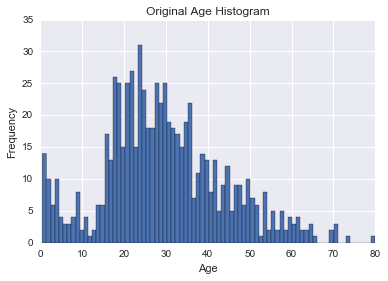

In [57]:
clean_df['Age'].dropna().hist(bins = 80)
plt.title("Original Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")


Now, I'll create a histogram of the new age frequency after imputing the frequency weighted median
for missing values.

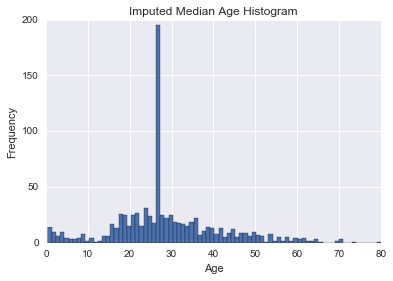

In [59]:
clean_df_imputed['Age'].hist(bins = 80)
plt.title("Imputed Median Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

That's not going to work. Imputing one value for all 177 missing values has 
pulled the distribution too far to the middle. Time to try something else.

Lets take a look at our clean data set grouped by Pclass.

In [62]:
clean_df.groupby(['Pclass']).describe()

Age        Fare  ParentOrChild         Sex  SibsOrSpouse  \
Pclass                                                                          
1      count  186.000000  216.000000     216.000000  216.000000    216.000000   
       mean    38.233441   84.154687       0.356481    0.435185      0.416667   
       std     14.802856   78.380373       0.693997    0.496933      0.611898   
       min      0.920000    0.000000       0.000000    0.000000      0.000000   
       25%     27.000000   30.923950       0.000000    0.000000      0.000000   
       50%     37.000000   60.287500       0.000000    0.000000      0.000000   
       75%     49.000000   93.500000       0.000000    1.000000      1.000000   
       max     80.000000  512.329200       4.000000    1.000000      3.000000   
2      count  173.000000  184.000000     184.000000  184.000000    184.000000   
       mean    29.877630   20.662183       0.380435    0.413043      0.402174   
       std     14.001077   13.417399       0.690963    0.493724      0.601633   
       min      0.670000    0.000000       0.000000    0.000000      0.000000   
       25%     23.000000   13.000000       0.000000    0.000000      0.000000   
       50%     29.000000   14.250000       0.000000    0.000000      0.000000   
       75%     36.000000   26.000000       1.000000    1.000000      1.000000   
       max     70.000000   73.500000       3.000000    1.000000      3.000000   
3      count  355.000000  491.000000     491.000000  491.000000    491.000000   
       mean    25.140620   13.675550       0.393075    0.293279      0.615071   
       std     12.495398   11.778142       0.888861    0.455730      1.374883   
       min      0.420000    0.000000       0.000000    0.000000      0.000000   
       25%     18.000000    7.750000       0.000000    0.000000      0.000000   
       50%     24.000000    8.050000       0.000000    0.000000      0.000000   
       75%     32.000000   15.500000       0.000000    1.000000      1.000000   
       max     74.000000   69.550000       6.000000    1.000000      8.000000   

                Survived  
Pclass                    
1      count  216.000000  
       mean     0.629630  
       std      0.484026  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count  184.000000  
       mean     0.472826  
       std      0.500623  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      1.000000  
       max      1.000000  
3      count  491.000000  
       mean     0.242363  
       std      0.428949  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

In [63]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              714 non-null float64
SibsOrSpouse     891 non-null int64
ParentOrChild    891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


I think the best way to impute age values is to fill with gaussian distributed 
values derived from each Pclass.  However, I haven't been able to figure out 
how to do that.  I will leave this problem for later and move forward with analysis
by dropping all of the null values.

In [64]:
clean_df_null_removed = clean_df.dropna()

Lets check to make sure null ages have all been removed.

In [39]:
np.isnan(clean_df_null_removed.Age).sum()

0

In [40]:
clean_df_null_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived         712 non-null int64
Pclass           712 non-null int64
Sex              712 non-null int64
Age              712 non-null float64
SibsOrSpouse     712 non-null int64
ParentOrChild    712 non-null int64
Fare             712 non-null float64
Embarked         712 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 50.1+ KB


Now lets break down the deaths by category.

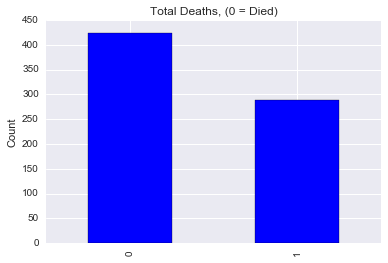

In [65]:
clean_df_null_removed.Survived.value_counts().plot('bar')
plt.title("Total Deaths, (0 = Died)")
plt.ylabel('Count')

In [66]:
clean_df_null_removed.Survived.value_counts()/len(clean_df_null_removed)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

Our sample survival rate as shown above is about 40%.  Lets break our sample down by characteristic and see how things change.

In [69]:
clean_df_null_removed.describe()

,Survived,Pclass,Sex,Age,SibsOrSpouse,ParentOrChild,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


First, lets break the survivors down by gender.

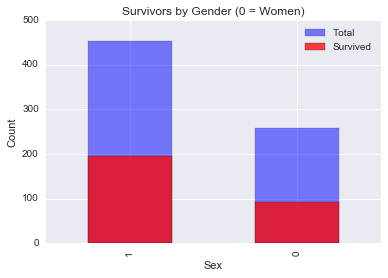

In [70]:
p1 = clean_df_null_removed.Sex.value_counts().plot('bar',stacked = True, alpha =.5)
p2 = clean_df_null_removed.Sex[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                           stacked=True,\
                                                                                           color = 'r',\
                                                                                          alpha=.75) 
plt.ylabel('Count')
plt.xlabel('Sex')
plt.title('Survivors by Gender (0 = Women)')
plt.legend(('Total', 'Survived'))

Below is the breakdown of the 40% gross survival rate into women's vs men's survival rates. It appears that men survived
at a rate twice that of women. However, these numbers are drawn from the sex of the survivors compared to raw population. 

In [73]:
clean_df_null_removed.Sex[clean_df_null_removed.Survived == 1].value_counts()\
 /len(clean_df_null_removed)

1    0.273876
0    0.130618
Name: Sex, dtype: float64

Because of this disparity it may be wise to break subsequent component analyses down by sex. Lets keep that in mind as we move forward.

Here are the same numbers as above after normalization. Here it is a bit easier to see that slightly more than two out of three survivors were female. It looks like chivalry was alive and well in April of 1912.

In [74]:
clean_df_null_removed.Sex[clean_df_null_removed.Survived == 1].value_counts()\
 /len(clean_df_null_removed)/0.404494

1    0.677084
0    0.322917
Name: Sex, dtype: float64

Lets see who survived based on Fare Paid.

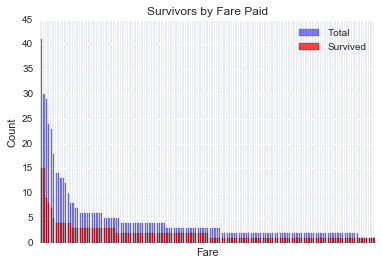

In [75]:
p1 = clean_df_null_removed.Fare.value_counts().plot('bar',stacked = True, alpha=.5)
p2 = clean_df_null_removed.Fare[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                        stacked=True,\
                                                                                        color = 'r', \
                                                                                        alpha=.75)
plt.ylabel('Count')
plt.xlabel('Fare')
plt.title('Survivors by Fare Paid')
plt.legend(('Total', 'Survived'))
plt.tick_params(axis ='x',
                bottom = 'off',
                which ='both',
                labelbottom ='off')

Wide variation of fares paid is evident from the above, but it does not look like a good predictor of survival rate.

Lets see who survived based on their passenger class.

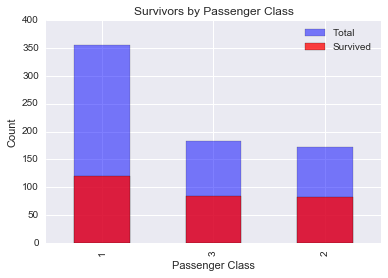

In [76]:
p1 = clean_df_null_removed.Pclass.value_counts().plot('bar',stacked = True, alpha=.5)
p2 = clean_df_null_removed.Pclass[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                           stacked=True,\
                                                                                           color = 'r', \
                                                                                            alpha=.75)
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.title('Survivors by Passenger Class')
plt.legend(('Total', 'Survived'))

It is pretty clear that passengers in class of all three classes did not do so well.
Survival rates from the above are:

In [93]:
clean_df_null_removed.groupby('Pclass')['Survived'].mean()

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

Lets see who people fared based on where they embarked.

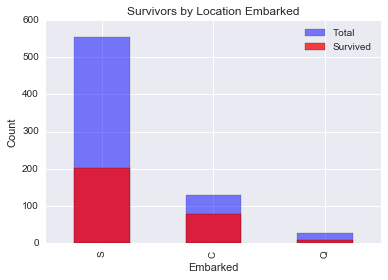

In [79]:
p1 = clean_df_null_removed.Embarked.value_counts().plot('bar',stacked = True, alpha =.5)
p2 = clean_df_null_removed.Embarked[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                           stacked=True,\
                                                                                           color = 'r',\
                                                                                          alpha=.75) 
plt.ylabel('Count')
plt.xlabel('Embarked')
plt.title('Survivors by Location Embarked')
plt.legend(('Total', 'Survived'))

Percentage wise, those embarking at Cherbourg (C) survived at a much higher rate. The data definition doesn't provide any framing for this.  I suspect where passengers got on, what they paid, and their passenger class would be correlated. This would be an interesting place for future research.


In [91]:
clean_df_null_removed.groupby('Embarked')['Survived'].mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

Lets see how family travelers fared. Parents or Children:

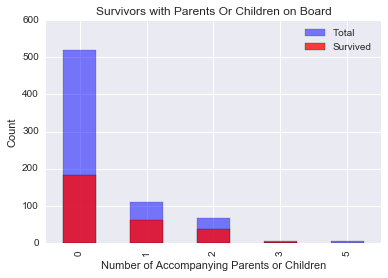

In [81]:
p1 = clean_df_null_removed.ParentOrChild.value_counts().plot('bar',stacked = True, alpha =.5)
p2 = clean_df_null_removed.ParentOrChild[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                           stacked=True,\
                                                                                           color = 'r',\
                                                                                          alpha=.75) 
plt.ylabel('Count')
plt.xlabel('Number of Accompanying Parents or Children')
plt.title('Survivors with Parents Or Children on Board')
plt.legend(('Total', 'Survived'))

Not having a single parent or child aboard was a major liability, while 1, 2, and 3 provided a significant improvement to survival odds. The old shipwreck adage "Women and children first" seems to hold true here.

In [90]:
clean_df_null_removed.groupby('ParentOrChild')['Survived'].mean()

ParentOrChild
0    0.354528
1    0.554545
2    0.573529
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Lets see how those with Siblings or a Spouse aboard fared.

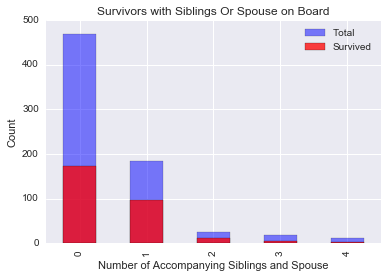

In [83]:
p1 = clean_df_null_removed.SibsOrSpouse.value_counts().plot('bar',stacked = True, alpha =.5)
p2 = clean_df_null_removed.SibsOrSpouse[clean_df_null_removed.Survived == 1].value_counts().plot('bar', \
                                                                                           stacked=True,\
                                                                                           color = 'r',\
                                                                                          alpha=.75) 
plt.ylabel('Count')
plt.xlabel('Number of Accompanying Siblings and Spouse')
plt.title('Survivors with Siblings Or Spouse on Board')
plt.legend(('Total', 'Survived'))

Similar to the Parent or Child variable, there is a significant difference between the lack of having a sibling or spouse aboard, an increased rate with 1 or 2, and a subsequent drop in survival rate at 3 and 4.

In [89]:
clean_df_null_removed.groupby('SibsOrSpouse')['Survived'].mean()

SibsOrSpouse
0    0.368870
1    0.530055
2    0.440000
3    0.333333
4    0.166667
5    0.000000
Name: Survived, dtype: float64

Overall, it appears that several of the investigated variables are correlated with survival rate. With gender and passenger class, siblings or spouse, and parent or child aboard with particularly strong correlations. Surprisingly, the strongest was embarkation location, with 60.7 % of people embarking at Cherbourg surviving.

Limitations:

1. This dataset contained quite a few missing values that I omitted from my calculations. Further analyses may want to find a better method for replacing the ommitted values, particulary in regards to age. 

2. Additionally, this dataset was not a complete list of people on the Titanic.  A better sample would inculde the remaining passengers and the crew. 

3. I relied primarily on visualizations to give the reader a feel for the data and trends.  A more rigorous analysis would include statistical testing of the validity of my claims.

Future work:

In future work towards building a predictive model for this data I would be very interested in building compound variables around gender and passenger class.

Until then, thank you for taking the time to view my work, and any constructive criticism or pointers would be greatly apreciated.

References used in completion of this work:
    
Books:
    Grus, Joel. <i>Data Science from Scratch: First Principles with Python</i>. N.p.: n.p., n.d. Print.
    Pierson, Lillian. <i>Data Science for Dummies</i>. N.p.: n.p., n.d. Print.
    <i>Building Machine Learning Systems with Python</i>. S.l.: Packt Limited, 2013. Print.  
    Witten, Ian H., and Eibe Frank. <i>Data Mining: Practical Machine Learning Tools and Techniques, 
    Third Edition (the Morgan Kaufmann Series in Data Management Systems)</i>. N.p.: n.p., n.d. Print.
        
Websites: 
    https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/
    http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
    http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
    http://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra
    http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
    http://matplotlib.org/examples/pylab_examples/subplots_demo.html
    http://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplot-lib-plot
    http://stackoverflow.com (I'm not sure how many individual pages I viewed, but it was many.)
    http://www.freecodecamp.com/
    https://www.edx.org/course/introduction-computer-science-mitx-6-00-1x-6
    https://www.udacity.com (I viewed several courses)

